In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.neighbors import KNeighborsClassifier
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from tqdm.notebook import trange

In [2]:
df = pd.read_csv('titanic-data.csv')
print(df.columns)
df.head()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
df = df[cols].copy()

In [4]:
for col in df.columns:
    print(f'{col}: {df[col].unique()}')

Survived: [0 1]
Pclass: [3 1 2]
Sex: ['male' 'female']
Age: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]
Fare: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.68

In [5]:
# recode sex
df['Sex'] = df['Sex'].replace({'male':1, 'female':0})

# check for null
print(df.isna().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64


In [6]:
male_ave_age = df[df['Sex']==1]['Age'].mean()
fem_ave_age = df[df['Sex']==0]['Age'].mean()

df.loc[df['Sex']==1] = df.loc[df['Sex']==1].fillna(male_ave_age)
df.loc[df['Sex']==0] = df.loc[df['Sex']==0].fillna(fem_ave_age)

# df.dropna(inplace=True)

In [7]:
df['Family Size'] = df['Parch'] + df['SibSp'] + 1
df.drop(columns=['Parch','SibSp'], inplace=True)

df.head()

,Survived,Pclass,Sex,Age,Fare,Family Size
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,2
2,1,3,0,26.0,7.9250,1
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,1


In [8]:
df.describe()

,Survived,Pclass,Sex,Age,Fare,Family Size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.736034,32.204208,1.904602
std,0.486592,0.836071,0.477990,13.014897,49.693429,1.613459
min,0.000000,1.000000,0.000000,0.420000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,22.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,30.000000,14.454200,1.000000
75%,1.000000,3.000000,1.000000,35.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,11.000000


C:\Users\Patrisha Estrada\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

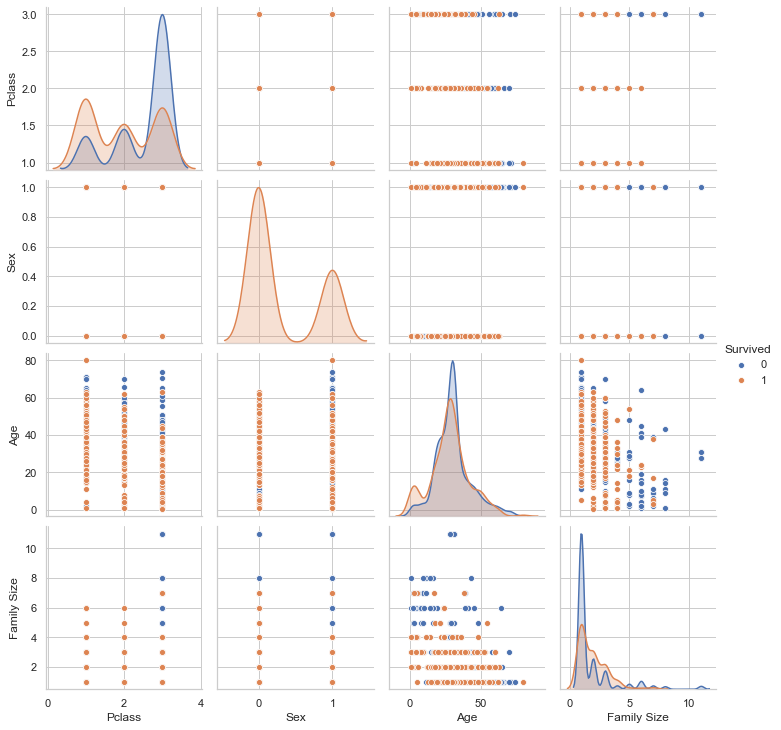

In [9]:
import seaborn as sns

plt.figure(figsize=(8,8))

sns.set(style="whitegrid")
sns.pairplot(df.loc[:,df.columns!='Fare'], hue="Survived")

plt.savefig('scatter.png')

In [10]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
# surv_1 = df[df['Survived']==1]
# surv_0 = df[df['Survived']==0].sample(350)

# df = pd.concat([surv_1, surv_0])

In [12]:
from sklearn.preprocessing import normalize

# # normalize numeric columns
df[['Family Size', 'Age']] = normalize(df[['Family Size', 'Age']])

In [13]:
# define x and y variables
# x = df.loc[:,(df.columns!='Survived')]

feature_cols = ['Age', 'Sex', 'Pclass', 'Family Size']
x = df[feature_cols]
y = df['Survived']

print(f'features df:')
display(x.head())

print(f'target:')
display(y.head())

features df:


,Age,Sex,Pclass,Family Size
0,0.995893,1,3,0.090536
1,0.998618,0,1,0.052559
2,0.999261,0,3,0.038433
3,0.998371,0,1,0.057050
4,0.999592,1,3,0.028560


target:


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
knn = 51
for seedN in trange(1,21, 1):
    X_train, X_test, y_train, y_test = train_test_split(x,y, 
                                                        test_size=0.2,
                                                        random_state=seedN,
                                                        stratify=y)

    training_accuracy = []
    test_accuracy = []
    neighbors_settings = range(1, knn) # try n_neighbors from 1 to 50

    for n_neighbors in neighbors_settings:   
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)  # build the model
        clf.fit(X_train, y_train)

        training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
        
    lahat_training[seedN] = training_accuracy
    lahat_test[seedN] = test_accuracy

  0%|          | 0/20 [00:00<?, ?it/s]

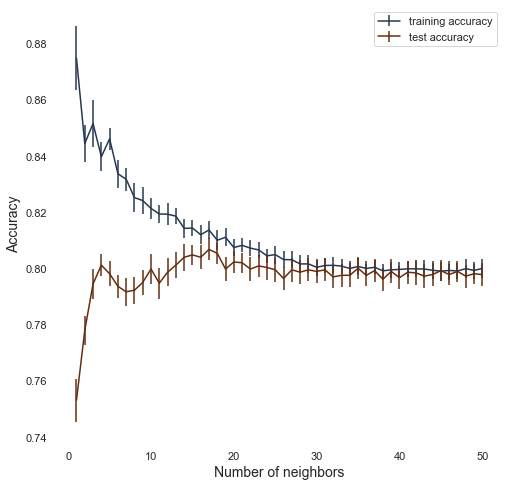

In [15]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_facecolor('white')
ax.grid(False)

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

plt.errorbar(range(1,51), lahat_training.mean(axis=1),
             yerr=lahat_training.std(axis=1)/2, label="training accuracy", color='#25364f')

plt.errorbar(range(1,51), lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1)/6, label="test accuracy", color="#642c0e")

plt.ylabel("Accuracy", fontsize=14)
plt.xlabel("Number of neighbors", fontsize=14)
plt.legend()

plt.show()

fig.savefig('model-trials.png', dpi='figure')

In [16]:
lahat_test.mean(axis=1)

0     0.753073
1     0.777933
2     0.794413
3     0.801117
4     0.798045
5     0.793575
6     0.791620
7     0.792179
8     0.794972
9     0.799721
10    0.794693
11    0.798603
12    0.801117
13    0.803911
14    0.804749
15    0.803911
16    0.806704
17    0.805307
18    0.799721
19    0.802235
20    0.801955
21    0.799721
22    0.800838
23    0.800279
24    0.799441
25    0.796369
26    0.799441
27    0.798603
28    0.799441
29    0.798883
30    0.799441
31    0.796927
32    0.797486
33    0.797486
34    0.800000
35    0.797486
36    0.799162
37    0.796089
38    0.798883
39    0.796648
40    0.798603
41    0.798324
42    0.797207
43    0.797765
44    0.799162
45    0.797765
46    0.798883
47    0.797207
48    0.798045
49    0.797765
dtype: float64

In [17]:
#knn 17 values between 80-82% accuracy for 20 trials
print(f'Trial train accuracy:\n{lahat_training.T[16]}')
print(f'Trial test accuracy:\n{lahat_test.T[16]}')

Trial train accuracy:
1     0.817416
2     0.811798
3     0.796348
4     0.807584
5     0.810393
6     0.821629
7     0.821629
8     0.806180
9     0.817416
10    0.814607
11    0.808989
12    0.811798
13    0.813202
14    0.816011
15    0.813202
16    0.813202
17    0.823034
18    0.816011
19    0.811798
20    0.820225
Name: 16, dtype: float64
Trial test accuracy:
1     0.821229
2     0.804469
3     0.860335
4     0.787709
5     0.815642
6     0.793296
7     0.776536
8     0.843575
9     0.798883
10    0.793296
11    0.826816
12    0.793296
13    0.798883
14    0.782123
15    0.843575
16    0.782123
17    0.815642
18    0.776536
19    0.810056
20    0.810056
Name: 16, dtype: float64


In [18]:
# Optimal K = 17
optk_train_acc = []
optk_test_acc = []

for seedN in trange(1,21, 1):
    X_train, X_test, y_train, y_test = train_test_split(x,y, 
                                                        test_size=0.20,
                                                        random_state=seedN,
                                                        stratify=y)

    clf = KNeighborsClassifier(n_neighbors=17)
    clf.fit(X_train, y_train)

    training_accuracy = (clf.score(X_train, y_train))
    test_accuracy = (clf.score(X_test, y_test))
        
    optk_train_acc.append(training_accuracy)
    optk_test_acc.append(test_accuracy)
    
print(f'training accuracy: {np.mean(optk_train_acc):.4f}')
print(f'test accuracy: {np.mean(optk_test_acc):.4f}')

  0%|          | 0/20 [00:00<?, ?it/s]

training accuracy: 0.8136
test accuracy: 0.8067


In [19]:
# X_train, X_test, y_train, y_test = train_test_split(x,y, 
#                                                         test_size=0.2,
#                                                         random_state=1,
#                                                         stratify=y)

# clf = KNeighborsClassifier(n_neighbors=17)
# clf.fit(X_train, y_train)

# training_accuracy = (clf.score(X_train, y_train))
# test_accuracy = (clf.score(X_test, y_test))

# print(training_accuracy)
# print(test_accuracy)

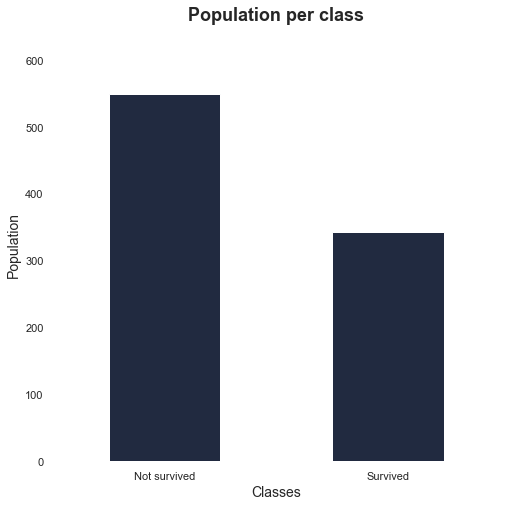

Population per class:     0
0  549
1  342
Proportion Chance Criterion: 52.70%
1.25 * Proportion Chance Criterion: 65.87%


In [20]:
from collections import Counter

fig, ax = plt.subplots(figsize=(8,8))
ax.set_facecolor('white')

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

state_counts = Counter(df['Survived'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar', grid=False, legend=False, ax=ax, color='#212a40')
ax.set_ylim(0, 650)
plt.xticks([0,1], labels=['Not survived', 'Survived'], rotation=0)
plt.title('Population per class', fontsize=18, weight='bold')
plt.ylabel('Population', fontsize=14)
plt.xlabel('Classes', fontsize=14)
plt.show()

fig.savefig('pop_class.png', dpi='figure')

num=(df_state[0]/df_state[0].sum())**2

print("Population per class:{}".format(df_state))

print("Proportion Chance Criterion: {:0.2f}%".format(100*num.sum()))
print("1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25*100*num.sum()))